## Libraries to use

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import re
from statsmodels.formula.api import ols
import numpy as np

# FIRST PART

In [2]:
def count(S, target):
 
    # if the total is 0, return 1
    if target == 0:
        return 1
 
    # return 0 if total becomes negative
    if target < 0:
        return 0
 
    # initialize the total number of ways to 0
    result = 0
 
    # do for each coin
    for c in S:
        # recur to see if total can be reached by including current coin `c`
        result += count(S, target - c)
 
    # return the total number of ways
    return result


In [3]:
if __name__ == '__main__':
 
    # `n` coins of given denominations
    S = [2, 3, 4]
 
    # total change required
    target = 6
 
    print('The total number of ways to get the desired change is', count(S, target))

The total number of ways to get the desired change is 10734753


In [4]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import re
from statsmodels.formula.api import ols

In [2]:
df_r1_c1 = pd.read_csv('datasets/region1_company1.csv')
df_r1_c2 = pd.read_csv('datasets/region1_company2.csv')
df_r2_c1 = pd.read_csv('datasets/region2_company1.csv')
df_r2_c2 = pd.read_csv('datasets/region2_company2.csv')
df_r1_c1.head()

,Sales_U,Sales_USD,Date
0,124885,129350,JAN0591.1
1,105285,107408,JAN1291.1
2,138363,136313,JAN1991.1
3,111494,113805,JAN2691.1
4,110686,113761,FEB0291.1


In [3]:
def string_date(string):
    string = re.sub("[A-Za-z]+", lambda ele: " " + ele[0] + " ", string)
    string = string[1:4] + ' ' + (' '.join([string[5:9][i:i+2] for i in range(0, len(string[5:9]), 2)]))
    string = string.replace(' ','-')
    return string

In [4]:
df_r1_c1.Date = df_r1_c1.Date.apply(lambda x: string_date(x) )
df_r1_c2.Date = df_r1_c1.Date.apply(lambda x: string_date(x) )
df_r2_c1.Date = df_r1_c1.Date.apply(lambda x: string_date(x) )
df_r2_c2.Date = df_r1_c1.Date.apply(lambda x: string_date(x) )

In [5]:
df_r1_c1.Date = df_r1_c1.Date.astype('datetime64[D]')
df_r1_c2.Date = df_r1_c1.Date.astype('datetime64[D]')
df_r2_c1.Date = df_r1_c1.Date.astype('datetime64[D]')
df_r2_c2.Date = df_r1_c1.Date.astype('datetime64[D]')

#                                               SECOND PART

## Question 1

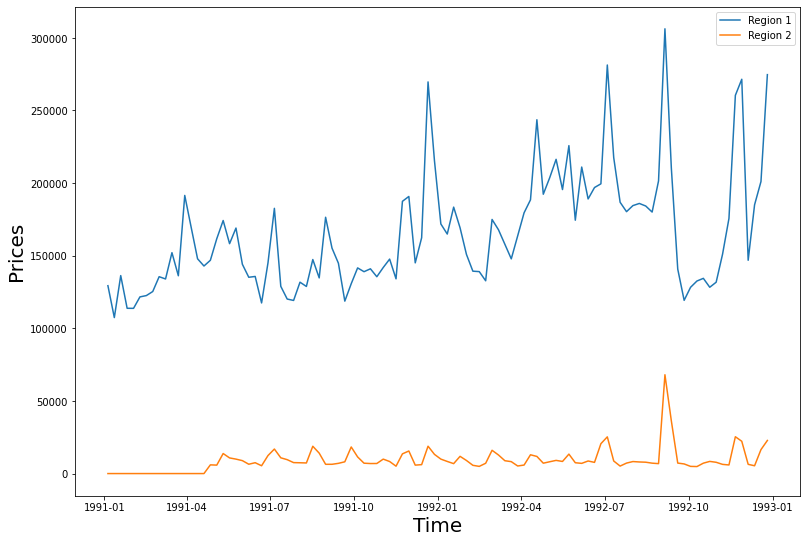

In [6]:
plt.figure(figsize=(13,9))
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Prices", fontsize = 20)
plt.plot(df_r1_c1.Date,df_r1_c1.Sales_USD)
plt.plot(df_r2_c1.Date,df_r2_c1.Sales_USD)
plt.legend(['Region 1','Region 2'])

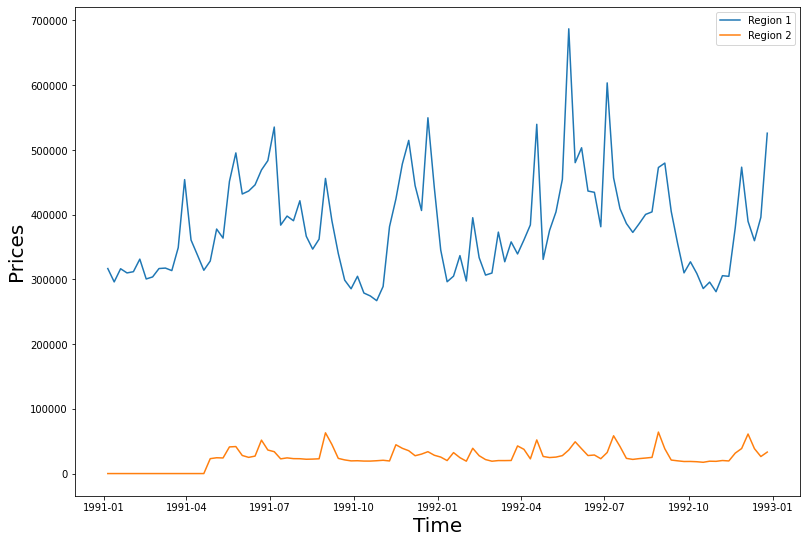

In [7]:
plt.figure(figsize=(13,9))
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Prices", fontsize = 20)
plt.plot(df_r1_c2.Date,df_r1_c2.Sales_USD)
plt.plot(df_r2_c2.Date,df_r2_c2.Sales_USD)
plt.legend(['Region 1','Region 2'])

## Questio 2

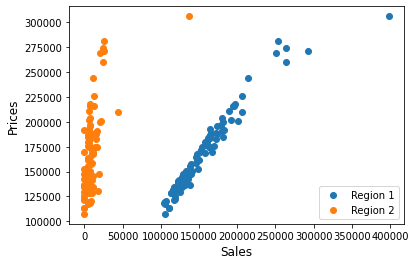

In [35]:
plt.xlabel("Sales", fontsize = 12)
plt.ylabel("Prices", fontsize = 12)
plt.scatter(df_r1_c1.Sales_U,df_r1_c1.Sales_USD)
plt.scatter(df_r2_c1.Sales_U,df_r1_c1.Sales_USD)
plt.legend(['Region 1','Region 2'])

## Region 1 is more elastic because the change in price produces a significant change in sales.

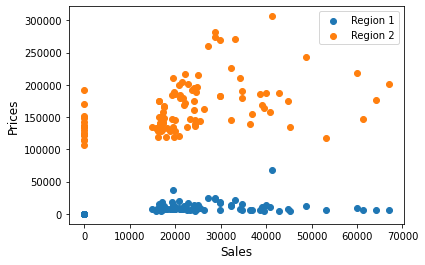

In [37]:
plt.xlabel("Sales", fontsize = 12)
plt.ylabel("Prices", fontsize = 12)
plt.scatter(df_r2_c2.Sales_U,df_r2_c1.Sales_USD)
plt.scatter(df_r2_c2.Sales_U,df_r1_c1.Sales_USD)
plt.legend(['Region 1','Region 2'])

## Region 2 is more elastic because the change in price produces a significant change in sales. In region 1 the price is almost constant

## Question 3

## Price elasticity of demand for region 1, company 1

In [13]:
result_r1_c1 = ols("Sales_U ~ Sales_USD", data=df_r1_c1).fit()
print(result_r1_c1.summary())

                            OLS Regression Results                            
Dep. Variable:                Sales_U   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1201.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           3.13e-58
Time:                        13:08:52   Log-Likelihood:                -1127.8
No. Observations:                 104   AIC:                             2260.
Df Residuals:                     102   BIC:                             2265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.18e+04   5199.178     -4.192      0.0

In [14]:
intercept_r1_c1, slope_r1_c1 = result_r1_c1.params
mean_price_r1_c1 = np.mean(df_r1_c1.Sales_USD)
mean_quantity_r1_c1 = np.mean(df_r1_c1.Sales_U)

In [15]:
#Price elasticity Formula
price_elasticity_r1_c1 = (slope_r1_c1)*(mean_price_r1_c1/mean_quantity_r1_c1)  
print('price elasticity of demand for company 1 in region 1:', price_elasticity_r1_c1)

price elasticity of demand for company 1 in region 1: 1.1422119379726128


## Price elasticity of demand for region 2, company 1

In [16]:
result_r2_c1 = ols("Sales_U ~ Sales_USD", data=df_r2_c1).fit()
print(result_r2_c1.summary())

                            OLS Regression Results                            
Dep. Variable:                Sales_U   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     851.5
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.59e-51
Time:                        13:08:53   Log-Likelihood:                -1027.1
No. Observations:                 104   AIC:                             2058.
Df Residuals:                     102   BIC:                             2063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5162.3732    681.306     -7.577      0.0

In [17]:
intercept_r2_c1, slope_r2_c1 = result_r2_c1.params
mean_price_r2_c1 = np.mean(df_r2_c1.Sales_USD)
mean_quantity_r2_c1 = np.mean(df_r2_c1.Sales_U)

In [18]:
#Price elasticity Formula
price_elasticity_r2_c1 = (slope_r2_c1)*(mean_price_r2_c1/mean_quantity_r2_c1)  
print('price elasticity of demand for company 1 in region 2:', price_elasticity_r2_c1)

price elasticity of demand for company 1 in region 2: 1.552692722951739


## Price elasticity of demand for region 1, company 2

In [19]:
result_r1_c2 = ols("Sales_U ~ Sales_USD", data=df_r1_c2).fit()
print(result_r1_c2.summary())

                            OLS Regression Results                            
Dep. Variable:                Sales_U   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4332.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.27e-85
Time:                        13:08:54   Log-Likelihood:                -1120.1
No. Observations:                 104   AIC:                             2244.
Df Residuals:                     102   BIC:                             2250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.331e+04   5674.482     -2.345      0.0

In [20]:
intercept_r1_c2, slope_r1_c2 = result_r1_c2.params
mean_price_r1_c2 = np.mean(df_r1_c2.Sales_USD)
mean_quantity_r1_c2 = np.mean(df_r1_c2.Sales_U)

In [21]:
#Price elasticity Formula
price_elasticity_r1_c2 = (slope_r1_c2)*(mean_price_r1_c2/mean_quantity_r1_c2)  
print('price elasticity of demand for company 1 in region 2:', price_elasticity_r1_c2)

price elasticity of demand for company 1 in region 2: 1.0377414144487425


## Price elasticity of demand for region 2, company 2

In [22]:
result_r2_c2 = ols("Sales_U ~ Sales_USD", data=df_r2_c2).fit()
print(result_r2_c1.summary())

                            OLS Regression Results                            
Dep. Variable:                Sales_U   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     851.5
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.59e-51
Time:                        13:08:55   Log-Likelihood:                -1027.1
No. Observations:                 104   AIC:                             2058.
Df Residuals:                     102   BIC:                             2063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5162.3732    681.306     -7.577      0.0

In [23]:
intercept_r2_c2, slope_r2_c2 = result_r2_c2.params
mean_price_r2_c2 = np.mean(df_r2_c2.Sales_USD)
mean_quantity_r2_c2 = np.mean(df_r2_c2.Sales_U)

In [24]:
#Price elasticity Formula
price_elasticity_r2_c2 = (slope_r2_c2)*(mean_price_r2_c2/mean_quantity_r2_c2)  
print('price elasticity of demand for company 1  in region 2:', price_elasticity_r2_c2)

price elasticity of demand for company 1  in region 2: 1.0770426006732474


## Absolute magnitud of the price elasticity of demand for company 1

In [31]:
print('price elasticity of demand for company 1:', np.absolute(price_elasticity_r1_c1 + price_elasticity_r2_c1))

price elasticity of demand for company 1: 2.694904660924352


## Absolute magnitud of the price elasticity of demand for company 2


In [33]:
print('price elasticity of demand for company 2:', np.absolute(price_elasticity_r1_c2 + price_elasticity_r2_c2))

price elasticity of demand for company 2: 2.11478401512199


## Question 4

## To calculate  the % change in unit sales we'll use:
$$\Delta Q=\:\frac{\Delta P.E.Q}{P}$$
$$\Delta Q: Change, in the sales$$
$$\Delta P: Change in the price$$
$$Q: Sales$$
$$P: Price$$
$$E: Price elasticity of demand$$




In [27]:
change_in_quantity = (0.1*1.1422119379726128*mean_quantity_r1_c1)/mean_price_r1_c1
print('the change in unit sales in company 1 for region 1 is:',change_in_quantity )

the change in unit sales in company 1 for region 1 is: 0.10573093076400639


## Question 5

## Company 1 presents a greater vulnerability since, having a larger price elasticity demand, changes in sales are more elastic to changes in prices.